# Introduction to photon shower shapes.

When photon passes through the ATLAS EM calorimeter it deposites the its via showering. The ATLAS calorimeter is devided into three segments (Layer 1 or strips, Layer 2 or middle, Layer 3 or back), and each one is plitted into cells. **Shower shapes** are built with energy deposits in each cell of the calorimeter and describe the shape of the shower. These shower shapes are used to discriminate a real photon from a fake photon, so-called as a **hadronic background or jets faking photon background**. 

The idea of this excersise is to investigate properties of photon shower shapes with respect to
 * its type: unconverted or converted photon
 * its transverse energy $E_T$
 * its psudorapidity $|\eta|$ (region of detector)

as well as how different are shower shapes in real and fake photons.

We'll do this by using a mixture of ROOT and python with some popular libraries. Let's import them.

In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook

import numpy as np
import pandas as pd
import ROOT
import root_numpy as rootnp

Welcome to JupyROOT 6.14/04


## Reading samples
We'll use two ATLAS MC samples with real photon `PyPt17_inf_mc16ad_v23.root` and with fake photon `Py8_jetjet_mc16ad_v21`. These samples are normalized to the detector conditions that were during 2015-2017 data taking period.

As you can produce them from your files with the following command in the terminal:
 * `hadd PyPt17_inf_mc16ad_v23.root PyPt17_inf_mc16a_v23.root PyPt17_inf_mc16d_v23.root`
 * `hadd Py8_jetjet_mc16ad_v21.root Py8_jetjet_mc16a_v21.root Py8_jetjet_mc16d_v21.root`

Set paths to your samples here:

In [2]:
fname_sig = '/home/kivernyk/workspace/photonID/files/v23/PyPt17_inf_mc16ad_v23.root'
fname_bkg = '/home/kivernyk/workspace/photonID/files/v21/Py8_jetjet_mc16ad_v21.root'

Let's define the variables that we want to extract from these samples. They can be divided into the following groups:
 * **shower shape** variables describing the shower development in the EM calorimeter
 * **photon isolation** variables describing an additional activity in a cone $\Delta R = \sqrt{\Delta\eta^2 + \Delta\phi^2}$ around the photons. They are extracted from Inner Detector by measuring momenta $p_T$ of charged particles or from the Calorimeters by measuring energy.
 * Variables that affect the shower shapes: $|\eta|$, photon $E_T$, type of the photon, and average number of interactions per bunch crossing $\mu$.
 * some useful variables.
 * total weight of the event.

In [3]:
list_of_branches_ShowerShapes=['y_Reta',
                  'y_Rphi',
                  'y_weta1',
                  'y_weta2',
                  'y_deltae',
                  'y_fracs1',
                  'y_Eratio',
                  'y_wtots1',
                  'y_Rhad',
                  'y_Rhad1',
                  'y_f1',
                  'y_e277']

list_of_branches_Isolations=['y_ptcone20',
                  'y_ptcone40',
                  'y_topoetcone20',
                  'y_topoetcone40']

list_of_branches_for_binning=['y_eta',
                        'y_pt',
                        'evt_mu',
                        'y_convType']

list_of_branches_for_selection=['y_isTruthMatchedPhoton', 'acceptEventPtBin','y_IsLoose','y_IsTight']

weight_branch=['mcTotWeight']

list_of_branches = list_of_branches_ShowerShapes+list_of_branches_Isolations+list_of_branches_for_binning
list_of_branches = list_of_branches+list_of_branches_for_selection+weight_branch

Reading trees...

In [4]:
#selection_sig = 'y_isTruthMatchedPhoton==0 && y_convType==0 && y_weta1>-100 && y_wtots1>-10 && y_pt>25 && abs(y_eta)<0.6 '
#selection_bkg = 'y_isTruthMatchedPhoton!=0 && y_convType==0 && y_weta1>-100 && y_wtots1>-10 && y_pt>25 && abs(y_eta)<0.6 '
selection_sig = ''
selection_bkg = ''

file_sig,file_bkg = ROOT.TFile(fname_sig),ROOT.TFile(fname_bkg)
tree_sig,tree_bkg = file_sig.Get('SinglePhoton'), file_bkg.Get('SinglePhoton')

Read all variables and convert into numpy. We have additional array of event weights. This can take some time...
To process all events in the samples, remove `stop=2000000`.

In [5]:
data_sig = rootnp.tree2array(tree_sig, branches=list_of_branches, 
                        selection=selection_sig,
                        start=0, stop=200000)
data_bkg = rootnp.tree2array(tree_bkg, branches=list_of_branches, 
                        selection=selection_bkg,
                        start=0, stop=200000)

weights_sig = rootnp.tree2array(tree_sig, branches=weight_branch, selection=selection_sig, start=0, stop=200000)
weights_bkg = rootnp.tree2array(tree_bkg, branches=weight_branch, selection=selection_bkg, start=0, stop=200000)
    
print len(data_sig)
print type(data_bkg)

200000
<type 'numpy.ndarray'>


Transform everything into pandas DataFrame and let's check at first 10 events from truth photon sample.

In [6]:
df_sig = pd.DataFrame(data_sig, columns=list_of_branches)
df_sig.head(10)

,y_Reta,y_Rphi,y_weta1,y_weta2,y_deltae,y_fracs1,y_Eratio,y_wtots1,y_Rhad,y_Rhad1,...,y_topoetcone40,y_eta,y_pt,evt_mu,y_convType,y_isTruthMatchedPhoton,acceptEventPtBin,y_IsLoose,y_IsTight,mcTotWeight
0,0.821843,0.813986,0.630457,0.011472,217.641266,0.330045,0.784235,7.426593,0.007657,0.003296,...,15.582891,0.658961,33.738548,31.50,3,False,False,False,False,56610.272890
1,0.704677,0.846410,0.598841,0.010026,98.487991,0.303293,0.855319,2.501361,0.003461,0.001621,...,16.635826,0.270192,22.824528,14.49,0,False,False,False,False,78406.561767
2,0.972616,0.979436,0.474282,0.009391,34.013012,0.161792,0.873508,2.472467,-0.010997,-0.011572,...,-2.848482,1.275991,25.195410,38.50,2,True,False,True,True,63722.749407
3,0.746847,0.697899,0.686084,0.011793,284.750580,0.382958,0.578106,3.107083,-0.000139,0.002994,...,9.138401,1.095634,22.298254,19.50,5,False,False,False,False,75501.179855
4,0.826851,0.948846,0.601397,0.010754,794.440674,0.744160,0.314248,3.275474,-0.009339,-0.008549,...,0.259635,-1.745998,22.084728,27.50,2,False,False,False,False,69758.498501
5,0.795750,0.944017,0.693636,0.012241,742.658142,0.567198,0.429952,7.587519,0.018451,0.018875,...,9.144439,-0.750298,29.143541,31.50,3,False,False,False,False,53845.255942
6,0.592320,0.703194,0.589912,0.016517,8741.128906,0.363289,0.137111,3.260976,0.220199,0.046034,...,43.491486,2.023163,59.903477,20.50,3,False,False,False,False,73109.448281
7,0.832361,0.846718,0.680972,0.012385,354.985229,0.625074,0.367554,3.165051,0.162330,0.158567,...,13.683403,-1.516698,24.108034,20.50,0,False,False,False,False,54313.639821
8,0.959258,0.984988,0.480172,0.009294,79.097961,0.772093,0.345538,-9998.942383,-0.003726,-0.002308,...,3.350104,0.227066,37.378101,12.50,0,False,True,True,False,52105.711846
9,0.850788,0.924385,0.626922,0.010569,944.985474,0.384644,0.323050,3.478212,0.016121,0.016604,...,4.778903,-0.800827,46.218826,18.50,0,False,False,False,False,74077.662559


Le'ts define additinional column indicating class: if this is truth photon (class=1) or background (class=0).

In [7]:
df_sig['class']=1 # indicator of signal photon sample

And let's look again at the shower shapes only.

In [8]:
df_ShowerShapes = df_sig[list_of_branches_ShowerShapes]
df_ShowerShapes.head(10)

,y_Reta,y_Rphi,y_weta1,y_weta2,y_deltae,y_fracs1,y_Eratio,y_wtots1,y_Rhad,y_Rhad1,y_f1,y_e277
0,0.821843,0.813986,0.630457,0.011472,217.641266,0.330045,0.784235,7.426593,0.007657,0.003296,0.215349,32122.279297
1,0.704677,0.846410,0.598841,0.010026,98.487991,0.303293,0.855319,2.501361,0.003461,0.001621,0.463434,16155.771484
2,0.972616,0.979436,0.474282,0.009391,34.013012,0.161792,0.873508,2.472467,-0.010997,-0.011572,0.085012,14828.956055
3,0.746847,0.697899,0.686084,0.011793,284.750580,0.382958,0.578106,3.107083,-0.000139,0.002994,0.323544,19397.011719
4,0.826851,0.948846,0.601397,0.010754,794.440674,0.744160,0.314248,3.275474,-0.009339,-0.008549,0.386233,33697.734375
5,0.795750,0.944017,0.693636,0.012241,742.658142,0.567198,0.429952,7.587519,0.018451,0.018875,0.330020,23534.435547
6,0.592320,0.703194,0.589912,0.016517,8741.128906,0.363289,0.137111,3.260976,0.220199,0.046034,0.433359,117991.992188
7,0.832361,0.846718,0.680972,0.012385,354.985229,0.625074,0.367554,3.165051,0.162330,0.158567,0.373323,25133.003906
8,0.959258,0.984988,0.480172,0.009294,79.097961,0.772093,0.345538,-9998.942383,-0.003726,-0.002308,0.016563,36264.003906
9,0.850788,0.924385,0.626922,0.010569,944.985474,0.384644,0.323050,3.478212,0.016121,0.016604,0.208511,44557.988281


In [9]:
df_ShowerShapes.describe(include='all')

,y_Reta,y_Rphi,y_weta1,y_weta2,y_deltae,y_fracs1,y_Eratio,y_wtots1,y_Rhad,y_Rhad1,y_f1,y_e277
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.935968,0.923717,-0.826981,0.010474,119.609558,0.279950,0.891028,-132.182053,0.015945,0.008948,0.274680,38455.847656
std,0.070161,0.084613,38.020199,0.001327,440.825104,0.136438,0.181955,1147.117065,0.081747,0.046424,0.107421,28839.517578
min,-13.941751,-1.560104,-999.183777,-0.004343,-645.639160,-4.041763,-0.004473,-9998.953125,-0.263121,-0.214139,-0.046179,-2743.597168
25%,0.928365,0.915929,0.582733,0.009586,15.950195,0.196948,0.908790,1.628123,-0.004608,-0.003425,0.206972,19198.015625
50%,0.947073,0.954947,0.620996,0.010263,35.978697,0.247974,0.951698,2.007270,0.001164,0.000298,0.282312,26745.876953
75%,0.962742,0.970577,0.662890,0.011161,74.060741,0.329701,0.972817,2.422087,0.012924,0.007681,0.352850,51308.003906
max,10.669806,5.278281,0.846699,0.020513,20500.507812,10.055568,1.001800,43.927975,3.462698,2.163980,0.779123,815758.000000


Let's merge signal and backgound at one data frame. We will use them.

In [10]:
df_bkg = pd.DataFrame(data_bkg, columns=list_of_branches)
df_bkg['class']=0 # indicator of signal photon sample
df = df_sig.append(df_bkg, ignore_index=True)

## Plotting distributions
Here we'll see how plot distributions in ROOT. 

In [11]:
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
ROOT.gStyle.SetOptStat(0)
from ROOT import SetOwnership 

Let's define a function `PlotRootHists` that draws a small list of ROOT histograms. The option `UnitScale` indicates if we want to scale the histograms to have an integral under the distribution to be 1.

In [83]:
def PlotRootHists(HistsList, LegendList, UnitScale):
    
    MyColors = [ROOT.kBlue, ROOT.kRed-8, ROOT.kBlack,ROOT.kMagenta]
    leg = ROOT.TLegend(.23,.32,.57,.53)
    SetOwnership( leg, 0 )
    
    leg.SetBorderSize(0);  leg.SetTextFont(42);
    leg.SetTextSize(0.03);  leg.SetFillColor(0);  leg.SetFillStyle(3001); leg.SetLineColor(0);
    
    for index,hist in enumerate(HistsList):
        hist.SetLineColor(MyColors[index])
        hist.SetLineWidth(2)
        if(LegendList):
            leg.AddEntry(hist,LegendList[index],"L")
    
        if(UnitScale):
            hist.Scale(1./hist.Integral())
    
        if(index==0):
            hist.Draw('hist')
        else:
            hist.Draw('hist same')
    
    leg.Draw()
    c.Draw()

So lt's try this function. We want to plot the distributions of `Reta` shower shape for signal and background. First, we create these two histograms. Second, we fill them. Here we plot them with `UnitScale=False`.

In [13]:
hReta_sig = ROOT.TH1D("hReta_sig","Reta",100,0.3,1.1)
hReta_bkg = ROOT.TH1D("hReta_bkg","Reta",100,0.3,1.1)
rootnp.fill_hist(hReta_sig, df[df['class']==1]['y_Reta'].values)
rootnp.fill_hist(hReta_bkg, df[df['class']==0]['y_Reta'].values)

hReta_sig.GetXaxis().SetTitle("R_{#eta}")

ROOT.enableJSVis()
PlotRootHists([hReta_sig,hReta_bkg], ['Signal (#gamma)','Background (jet)'], UnitScale=False)

Looks great! But we forgot event weights...

In [14]:
hReta_sig_weighted = ROOT.TH1D("hReta_sig_weighted","Reta",100,0.3,1.1)
hReta_bkg_weighted = ROOT.TH1D("hReta_bkg_weighted","Reta",100,0.3,1.1)

rootnp.fill_hist(hReta_sig_weighted, df[df['class']==1]['y_Reta'].values, df[df['class']==1]['mcTotWeight'].values)
rootnp.fill_hist(hReta_bkg_weighted, df[df['class']==0]['y_Reta'].values, df[df['class']==0]['mcTotWeight'].values)

hReta_sig_weighted.GetXaxis().SetTitle("R_{#eta}")

PlotRootHists([hReta_sig_weighted,hReta_bkg_weighted], ['Signal (#gamma)','Background (jet)'],UnitScale=False)

Interesting! In fact we have much more background then signal. Actually that's why we want to have `photon identification`. Goal is to select signal and regect background events.

Let's scale them to the unit area.

In [15]:
PlotRootHists([hReta_sig_weighted,hReta_bkg_weighted], ['Signal (#gamma)','Background (jet)'],UnitScale=True)

We can see that the shapes of signal photon and background photon are different. It means that we can find a cut that rejects background events as much as possible while keeping interesting for us signal. But we have to be careful, as here we look at the distributions inclusive in $\eta, E_T$ and `conversion type`.  

Let's check what are Reta distributions for unconverted and converted photons. We also add $|\eta|<0.6$ requirement.

In [16]:
hReta_sig_unconv = ROOT.TH1D("hReta_sig_unconv","Reta",100,0.3,1.1)
hReta_sig_conv = ROOT.TH1D("hReta_sig_conv","Reta",100,0.3,1.1)

rootnp.fill_hist(hReta_sig_unconv, df[ (df['class']==1) & (df['y_convType']==0) & (abs(df['y_eta'])<0.6) ]['y_Reta'].values, df[ (df['class']==1) & (df['y_convType']==0) & (abs(df['y_eta'])<0.6) ]['mcTotWeight'].values)
rootnp.fill_hist(hReta_sig_conv, df[ (df['class']==1) & (df['y_convType']!=0) & (abs(df['y_eta'])<0.6) ]['y_Reta'].values, df[ (df['class']==1) & (df['y_convType']!=0) & (abs(df['y_eta'])<0.6) ]['mcTotWeight'].values)

hReta_sig_unconv.GetXaxis().SetTitle("R_{#eta}")
PlotRootHists([hReta_sig_unconv,hReta_sig_conv], ['unconv-#gamma','conv-#gamma'],UnitScale=True)

Let's check the same for Rphi distributions as it's expected Rphi should have the largest difference between converted and unconverted photons.

In [17]:
hRphi_sig_unconv = ROOT.TH1D("hRphi_sig_unconv","Rphi",100,0.3,1.1)
hRphi_sig_conv = ROOT.TH1D("hRphi_sig_conv","Rphi",100,0.3,1.1)

rootnp.fill_hist(hRphi_sig_unconv, df[ (df['class']==1) & (df['y_convType']==0) & (abs(df['y_eta'])<0.6) ]['y_Rphi'].values, df[ (df['class']==1) & (df['y_convType']==0) & (abs(df['y_eta'])<0.6) ]['mcTotWeight'].values)
rootnp.fill_hist(hRphi_sig_conv, df[ (df['class']==1) & (df['y_convType']!=0) & (abs(df['y_eta'])<0.6) ]['y_Rphi'].values, df[ (df['class']==1) & (df['y_convType']!=0) & (abs(df['y_eta'])<0.6) ]['mcTotWeight'].values)

hRphi_sig_unconv.GetXaxis().SetTitle("R_{#phi}")
PlotRootHists([hRphi_sig_unconv,hRphi_sig_conv], ['unconv-#gamma','conv-#gamma'],UnitScale=True)

It would be interesting to look at the following distributions:
* photon y_eta and y_pt for signal and background, separately for converted and unconverted photons.
* all shower shape distributions for signal and background on the same plot, separately for converted and unconverted photons.
* how the shower shapes evolve versus photon eta? The following y_eta bins are used: $0-0.6-0.8-1.15-1.37$ and $1.52-1.81-2.01-2.37$ (The crack region is dropped).
* how the shower shapes evolve versus photon pt?

### Plotting functions

Let's define a plotting function PlotHists for simplicity

In [18]:
def PlotHists(nhists, varname, hrange, condlist, leglist, UnitScale=True):
    # Inputs:
    # - nhists : number of plotted histograms (e.g 1 or 2)
    # - varname : name of variable (e.g y_Reta). Should agree with the dataframe
    # - hrange : range [xmin, xmax] in which the plotting should be done (e.g. [0.3, 1.1])
    # - condlist : conditions for selection of corresponding (e.g (df['class']==1))
    # - leglist : list of strings corresponding to and explaining histograms (e.g ['conv', 'unconv'])
    # - UnitScale : True by default
    
    HistsList = []
    LegendList = leglist
    
    for myhist in range(nhists):   ### loop over histograms
        
        # Create a histogram
        HistsList.append( ROOT.TH1D("hist"+str(myhist), varname, 100, hrange[0], hrange[1]) )
        
        # Fill a histogram
        rootnp.fill_hist(HistsList[myhist], df[ condlist[myhist] ][varname].values, 
                         df[ condlist[myhist] ]['mcTotWeight'].values)
        
        # Add a title to x-axis
        HistsList[myhist].GetXaxis().SetTitle(varname)
    
    # Plotting
    PlotRootHists(HistsList, LegendList, UnitScale)
    
    # Return to deal with a bug
    return HistsList

Let's try this function on $R_\eta$

[<ROOT.TH1D object ("hist0") at 0x5631096543d0>,
 <ROOT.TH1D object ("hist1") at 0x563109625dd0>]

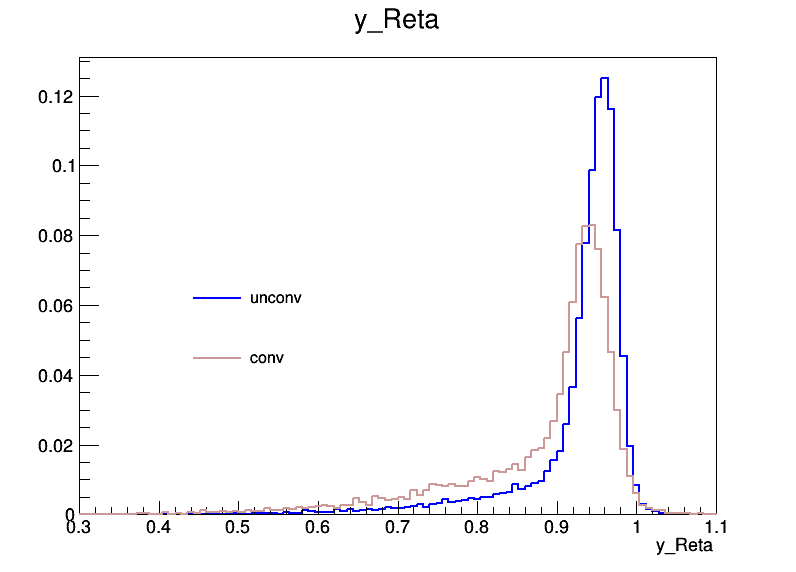

In [19]:
cond1 = (df['class']==1) & (df['y_convType']==0) & (abs(df['y_eta'])<0.6)
cond2 = (df['class']==1) & (df['y_convType']!=0) & (abs(df['y_eta'])<0.6)
ROOT.disableJSVis()

PlotHists(2, "y_Reta", [0.3, 1.1], [cond1, cond2], ['unconv', 'conv'])

To make sure that the considered signal photon is actually truth photon, we will use the follwoing requirement:

df['y_isTruthMatchedPhoton']==True

As one can notice from the plot bellow this requirement changes the shower shapes distributions significantly.

[<ROOT.TH1D object ("hist0") at 0x56310965c190>,
 <ROOT.TH1D object ("hist1") at 0x5631096608b0>]

Warning in <TFile::Append>: Replacing existing TH1: hist0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist1 (Potential memory leak).


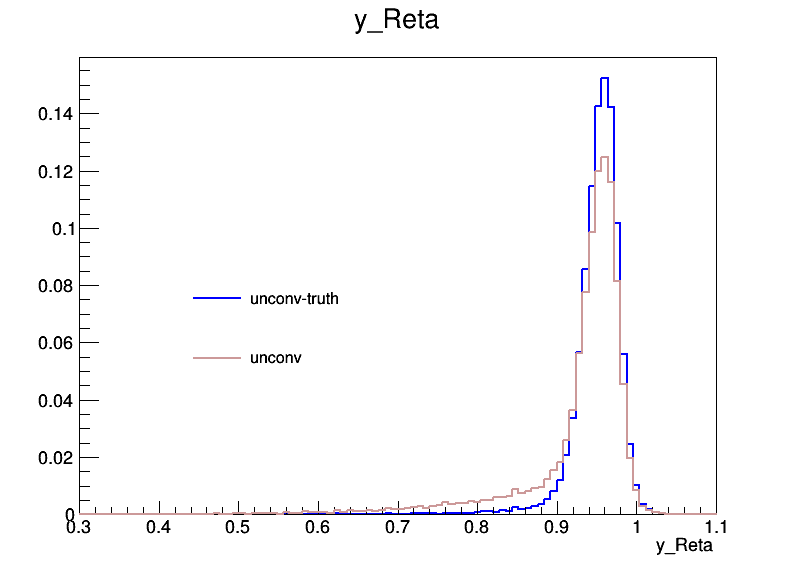

In [20]:
cond1 = (df['class']==1) & (df['y_convType']==0) & (abs(df['y_eta'])<0.6) & (df['y_isTruthMatchedPhoton']==True)
cond2 = (df['class']==1) & (df['y_convType']==0) & (abs(df['y_eta'])<0.6) 

PlotHists(2, "y_Reta", [0.3, 1.1], [cond1, cond2], ['unconv-truth', 'unconv'])

#### Dividing canvas into Pads
To simplify workflow and for better comparisons of distributions let's plot several plots on the same canvas. We define several help functions below.

In [21]:
def GetMyPads():
    canvas = ROOT.TCanvas("mycanvas","The Canvas Title",1000,500)
    canvas.cd()
    
    pad1 = ROOT.TPad("pad1", "pad1", 0, 0, 0.5, 1)
    pad2 = ROOT.TPad("pad2", "pad2", 0.5, 0, 1, 1)
    
    pad1.Draw()
    pad2.Draw()
    
    return canvas, pad1, pad2

In [91]:
# Function to add some text to the plot
def addText(x1, y1, x2, y2, mytext, textsize):
    pav=ROOT.TPaveText(x1, y1, x2, y2,"NDC")
    pav.SetFillColor( 0 )  
    pav.SetBorderSize( 0 ); 
    pav.SetTextColor(1);   
    pav.SetTextAlign(12);
    pav.SetTextFont(42);   
    pav.SetTextSize(textsize);
    
    pav.AddText(mytext)
    #pav.Draw()
    return pav

Here is how it works for Reta:

Warning in <TCanvas::Constructor>: Deleting canvas with same name: mycanvas
Warning in <TFile::Append>: Replacing existing TH1: hist0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist1 (Potential memory leak).


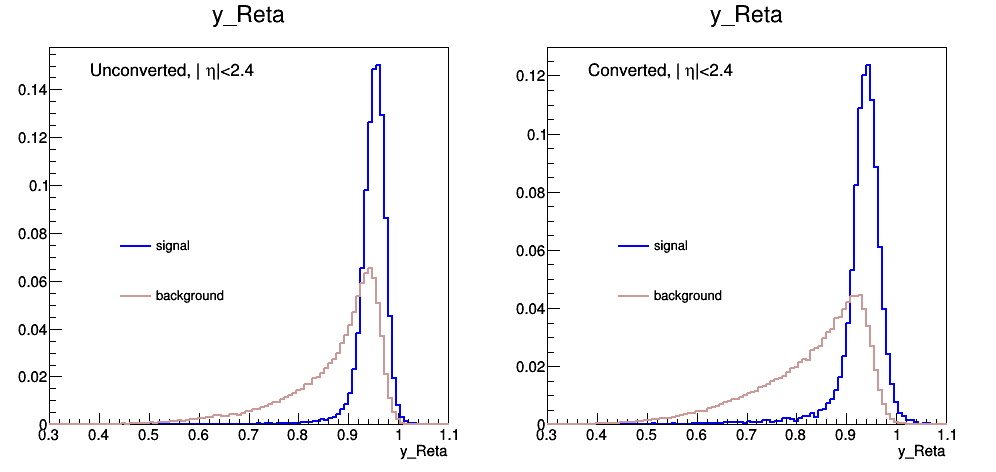

In [92]:
c, pad1, pad2 = GetMyPads() # getting canvas splitted into pads

# Left pad: unconverted photons
pad1.cd()
cond1_unc = (df['class']==1) & (df['y_convType']==0) & (abs(df['y_eta'])<2.4) & (df['y_isTruthMatchedPhoton']==True) # signal
cond2_unc = (df['class']==0) & (df['y_convType']==0) & (abs(df['y_eta'])<2.4) & (df['y_isTruthMatchedPhoton']==False) # background
HistsList1 = PlotHists(2, "y_Reta", [0.3, 1.1], [cond1_unc, cond2_unc], ['signal', 'background'])
pav1=addText(0.17,0.82,0.42,0.88, "Unconverted, |#eta|<2.4", 0.04)
pav1.Draw()

#Right pad: converted photons
pad2.cd()
cond1_conv = (df['class']==1) & (df['y_convType']!=0) & (abs(df['y_eta'])<2.4) & (df['y_isTruthMatchedPhoton']==True) # signal
cond2_conv = (df['class']==0) & (df['y_convType']!=0) & (abs(df['y_eta'])<2.4) & (df['y_isTruthMatchedPhoton']==False) # background
HistsList2 = PlotHists(2, "y_Reta", [0.3, 1.1], [cond1_conv, cond2_conv], ['signal', 'background'])
pav2=addText(0.17,0.82,0.42,0.88, "Converted, |#eta|<2.4", 0.04)
pav2.Draw()

c.Draw()

And for Rhad we do (note that we can use condition strings and pads defined above to avoid a repetition):

Warning in <TCanvas::Constructor>: Deleting canvas with same name: mycanvas
Warning in <TFile::Append>: Replacing existing TH1: hist0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist1 (Potential memory leak).


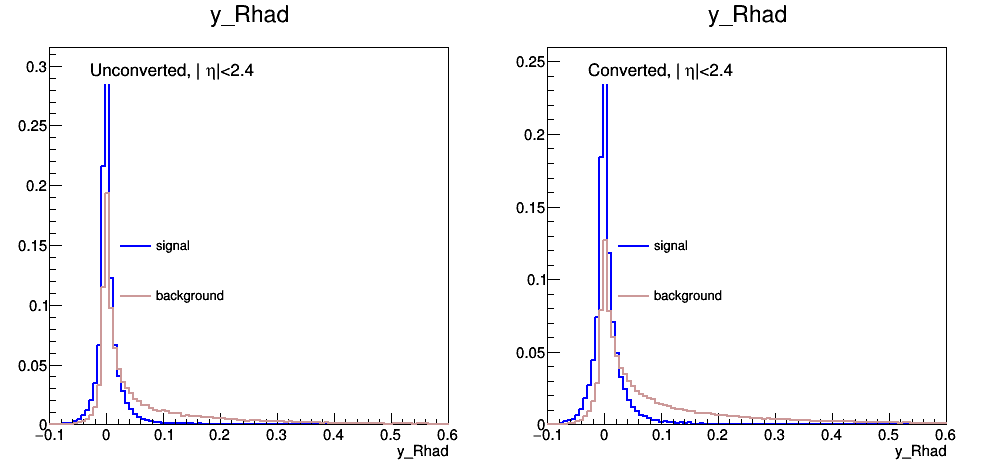

In [24]:
c, pad1, pad2 = GetMyPads() # getting canvas splitted into pads

# Left pad: unconverted photons
pad1.cd()
HistsList1 = PlotHists(2, "y_Rhad", [-0.1, 0.6], [cond1_unc, cond2_unc], ['signal', 'background'])
pav1.Draw()

#Right pad: converted photons
pad2.cd()
HistsList2 = PlotHists(2, "y_Rhad", [-0.1, 0.6], [cond1_conv, cond2_conv], ['signal', 'background'])
pav2.Draw()

c.Draw()

#### The distributions in bins of $|\eta|$ 
We consider 7 bins following variations of calorimeter granularity and amount of material in front of calorimeter:
$0-0.6-0.8-1.15-1.37$ and $1.52-1.81-2.01-2.37$.

We will need to plot the distributions for different eta on the same canvas.

In [76]:
def GetMyPadsStacked(nstacks):
    cy = nstacks*200
    cx = 2*500
    canvas = ROOT.TCanvas("mycanvas","The Canvas Title", cx, cy)
    canvas.cd()
    pads = []
    
    for i in range(nstacks):
        xlow1, ylow1, xup1, yup1 = 0,   float(i)/nstacks,  0.5, float(i+1)/nstacks
        xlow2, ylow2, xup2, yup2 = 0.5, float(i)/nstacks,  1,   float(i+1)/nstacks
        
        pad1 = ROOT.TPad("pad"+str(i)+'a', "pad1", xlow1, ylow1, xup1, yup1)
        pad2 = ROOT.TPad("pad"+str(i)+'b', "pad2", xlow2, ylow2, xup2, yup2)
    
        pad1.Draw()
        pad2.Draw()
        
        pads.append(pad1)
        pads.append(pad2)
    
    return canvas, pads

In [73]:
def setPadMargins(pad, mleft, mright, mbottom, mup):
    pad.SetTopMargin(mup)
    pad.SetBottomMargin(mbottom)
    pad.SetLeftMargin(mleft)
    pad.SetRightMargin(mright)
    
    return pad

In [78]:
def prepareHist(hist):
    hist.SetTitle("")
    hist.GetXaxis().SetTitleSize(0.072)
    hist.GetXaxis().SetTitleOffset(0.8)
    hist.GetXaxis().SetLabelSize(0.072)
    hist.GetYaxis().SetLabelSize(0)
    
    return hist

Warning in <TCanvas::Constructor>: Deleting canvas with same name: mycanvas
Warning in <TFile::Append>: Replacing existing TH1: hist0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist0 (Potential memory leak).
Warning in 

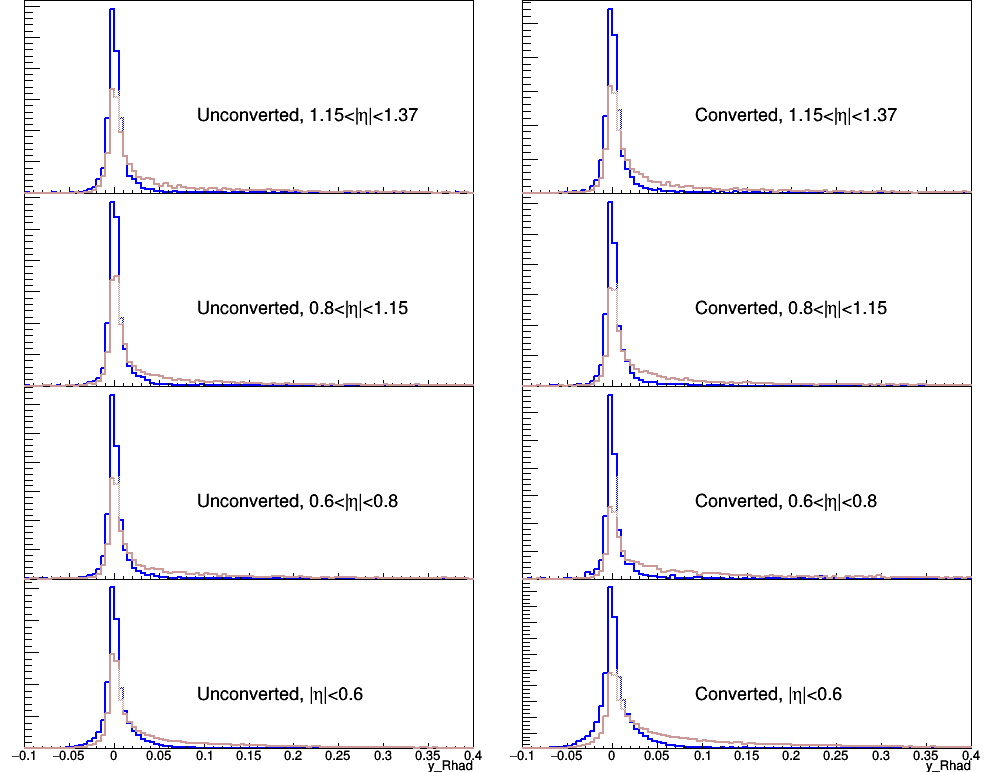

In [111]:
c, pads = GetMyPadsStacked(4) # getting canvas splitted into pads

# Left pad: unconverted photons
pads[0].cd()
pads[0] = setPadMargins(pads[0], 0.05, 0.05, 0.12, 0)
cond1_eta1_unc = (df['class']==1) & (df['y_convType']==0) & (abs(df['y_eta'])<0.6) & (df['y_isTruthMatchedPhoton']==True) # signal
cond2_eta1_unc = (df['class']==0) & (df['y_convType']==0) & (abs(df['y_eta'])<0.6) & (df['y_isTruthMatchedPhoton']==False) # background
HistsList1 = PlotHists(2, "y_Rhad", [-0.1, 0.4], [cond1_eta1_unc, cond2_eta1_unc], None)
HistsList1[0] = prepareHist(HistsList1[0])
pav1=addText(0.37,0.32,0.92,0.48, "Unconverted, |#eta|<0.6", 0.10)
pav1.Draw()

#Right pad: converted photons
pads[1].cd()
pads[1] = setPadMargins(pads[1], 0.05, 0.05, 0.12, 0)
cond1_eta1_conv = (df['class']==1) & (df['y_convType']!=0) & (abs(df['y_eta'])<0.6) & (df['y_isTruthMatchedPhoton']==True) # signal
cond2_eta1_conv = (df['class']==0) & (df['y_convType']!=0) & (abs(df['y_eta'])<0.6) & (df['y_isTruthMatchedPhoton']==False) # background
HistsList2 = PlotHists(2, "y_Rhad", [-0.1, 0.4], [cond1_eta1_conv, cond2_eta1_conv], None)
HistsList2[0] = prepareHist(HistsList2[0])
pav2=addText(0.37,0.32,0.92,0.48, "Converted, |#eta|<0.6", 0.10)
pav2.Draw()

# Left pad: unconverted photons
pads[2].cd()
pads[2] = setPadMargins(pads[2], 0.05, 0.05, 0, 0)
cond1_eta2_unc = (df['class']==1) & (df['y_convType']==0) & (abs(df['y_eta'])>0.6) & (abs(df['y_eta'])<0.8) & (df['y_isTruthMatchedPhoton']==True) # signal
cond2_eta2_unc = (df['class']==0) & (df['y_convType']==0) & (abs(df['y_eta'])>0.6) & (abs(df['y_eta'])<0.8) & (df['y_isTruthMatchedPhoton']==False) # background
HistsList3 = PlotHists(2, "y_Rhad", [-0.1, 0.4], [cond1_eta2_unc, cond2_eta2_unc], None)
HistsList3[0] = prepareHist(HistsList3[0])
pav3=addText(0.37,0.32,0.92,0.48, "Unconverted, 0.6<|#eta|<0.8", 0.10)
pav3.Draw()

#Right pad: converted photons
pads[3].cd()
pads[3] = setPadMargins(pads[3], 0.05, 0.05, 0, 0)
cond1_eta2_conv = (df['class']==1) & (df['y_convType']!=0) & (abs(df['y_eta'])>0.6) & (abs(df['y_eta'])<0.8) & (df['y_isTruthMatchedPhoton']==True) # signal
cond2_eta2_conv = (df['class']==0) & (df['y_convType']!=0) & (abs(df['y_eta'])>0.6) & (abs(df['y_eta'])<0.8) & (df['y_isTruthMatchedPhoton']==False) # background
HistsList4 = PlotHists(2, "y_Rhad", [-0.1, 0.4], [cond1_eta2_conv, cond2_eta2_conv], None)
HistsList4[0] = prepareHist(HistsList4[0])
pav4=addText(0.37,0.32,0.92,0.48, "Converted, 0.6<|#eta|<0.8", 0.10)
pav4.Draw()

# Left pad: unconverted photons
pads[4].cd()
pads[4] = setPadMargins(pads[4], 0.05, 0.05, 0, 0)
cond1_eta3_unc = (df['class']==1) & (df['y_convType']==0) & (abs(df['y_eta'])>0.8) & (abs(df['y_eta'])<1.15) & (df['y_isTruthMatchedPhoton']==True) # signal
cond2_eta3_unc = (df['class']==0) & (df['y_convType']==0) & (abs(df['y_eta'])>0.8) & (abs(df['y_eta'])<1.15) & (df['y_isTruthMatchedPhoton']==False) # background
HistsList5 = PlotHists(2, "y_Rhad", [-0.1, 0.4], [cond1_eta3_unc, cond2_eta3_unc], None)
HistsList5[0] = prepareHist(HistsList5[0])
pav5=addText(0.37,0.32,0.92,0.48, "Unconverted, 0.8<|#eta|<1.15", 0.10)
pav5.Draw()

#Right pad: converted photons
pads[5].cd()
pads[5] = setPadMargins(pads[5], 0.05, 0.05, 0, 0)
cond1_eta3_conv = (df['class']==1) & (df['y_convType']!=0) & (abs(df['y_eta'])>0.8) & (abs(df['y_eta'])<1.15) & (df['y_isTruthMatchedPhoton']==True) # signal
cond2_eta3_conv = (df['class']==0) & (df['y_convType']!=0) & (abs(df['y_eta'])>0.8) & (abs(df['y_eta'])<1.15) & (df['y_isTruthMatchedPhoton']==False) # background
HistsList6 = PlotHists(2, "y_Rhad", [-0.1, 0.4], [cond1_eta3_conv, cond2_eta3_conv], None)
HistsList6[0] = prepareHist(HistsList6[0])
pav6=addText(0.37,0.32,0.92,0.48, "Converted, 0.8<|#eta|<1.15", 0.10)
pav6.Draw()


# Left pad: unconverted photons
pads[6].cd()
pads[6] = setPadMargins(pads[6], 0.05, 0.05, 0, 0)
cond1_eta4_unc = (df['class']==1) & (df['y_convType']==0) & (abs(df['y_eta'])>1.15) & (abs(df['y_eta'])<1.37) & (df['y_isTruthMatchedPhoton']==True) # signal
cond2_eta4_unc = (df['class']==0) & (df['y_convType']==0) & (abs(df['y_eta'])>1.15) & (abs(df['y_eta'])<1.37) & (df['y_isTruthMatchedPhoton']==False) # background
HistsList7 = PlotHists(2, "y_Rhad", [-0.1, 0.4], [cond1_eta4_unc, cond2_eta4_unc], None)
HistsList7[0] = prepareHist(HistsList7[0])
pav7=addText(0.37,0.32,0.92,0.48, "Unconverted, 1.15<|#eta|<1.37", 0.10)
pav7.Draw()

#Right pad: converted photons
pads[7].cd()
pads[7] = setPadMargins(pads[7], 0.05, 0.05, 0, 0)
cond1_eta4_conv = (df['class']==1) & (df['y_convType']!=0) & (abs(df['y_eta'])>1.15) & (abs(df['y_eta'])<1.37) & (df['y_isTruthMatchedPhoton']==True) # signal
cond2_eta4_conv = (df['class']==0) & (df['y_convType']!=0) & (abs(df['y_eta'])>1.15) & (abs(df['y_eta'])<1.37) & (df['y_isTruthMatchedPhoton']==False) # background
HistsList8 = PlotHists(2, "y_Rhad", [-0.1, 0.4], [cond1_eta4_conv, cond2_eta4_conv], None)
HistsList8[0] = prepareHist(HistsList8[0])
pav8=addText(0.37,0.32,0.92,0.48, "Converted, 1.15<|#eta|<1.37", 0.10)
pav8.Draw()


c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: mycanvas
Warning in <TFile::Append>: Replacing existing TH1: hist0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist0 (Potential memory leak).
Warning in 

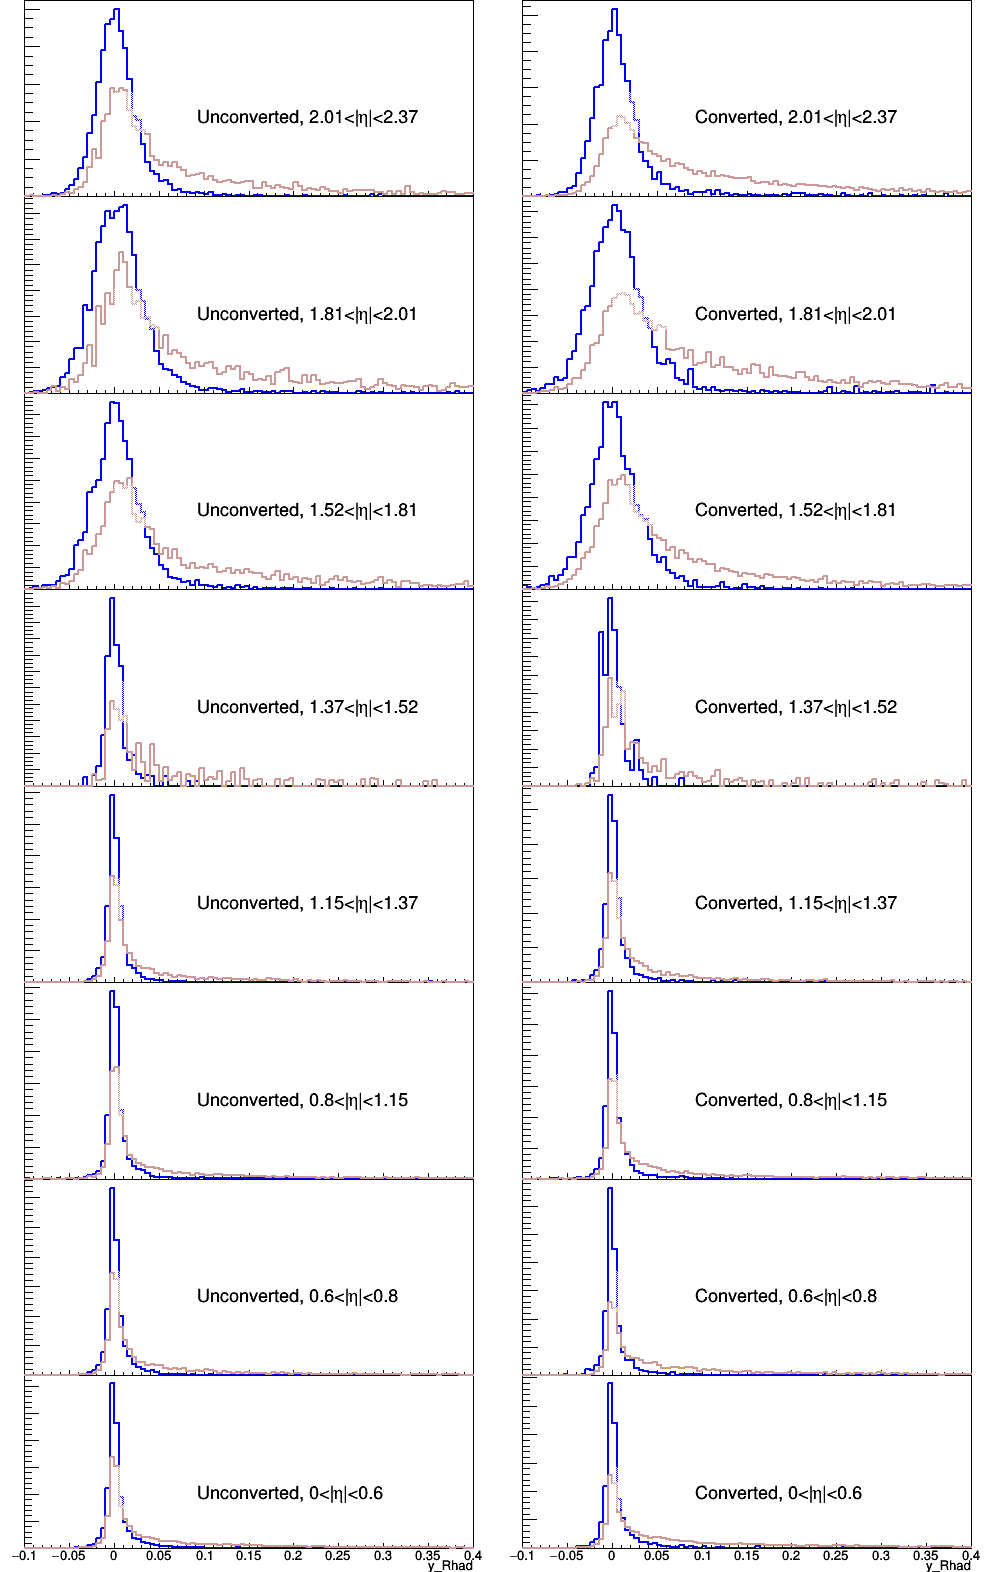

In [141]:
nstacks = 8
c, pads = GetMyPadsStacked(nstacks) # getting canvas splitted into pads

condition_unc_sig = (df['class']==1) & (df['y_isTruthMatchedPhoton']==True) & (df['y_convType']==0)
condition_unc_bkg = (df['class']==0) & (df['y_isTruthMatchedPhoton']==False) & (df['y_convType']==0)
condition_conv_sig = (df['class']==1) & (df['y_isTruthMatchedPhoton']==True) & (df['y_convType']!=0)
condition_conv_bkg = (df['class']==0) & (df['y_isTruthMatchedPhoton']==False) & (df['y_convType']!=0)

xmin, xmax = -0.1, 0.4
myVar = "y_Rhad"

#print condition_unc_sig

#print df[(condition_unc_sig) & (abs(df['y_eta'])<0.6)]

etabins = [0, 0.6, 0.8, 1.15, 1.37, 1.52, 1.81, 2.01, 2.37]

HistsList1=[]
HistsList2=[]

pav1 = []
pav2 = []

for istack in range(nstacks):
    pads[2*istack].cd()
    if(istack==0):
        pads[2*istack] = setPadMargins(pads[2*istack], 0.05, 0.05, 0.12, 0)
    else:
        pads[2*istack] = setPadMargins(pads[2*istack], 0.05, 0.05, 0.0,  0)
        
    cond1_unc = (abs(df['y_eta'])>etabins[istack]) & (abs(df['y_eta'])<etabins[istack+1]) & (condition_unc_sig)
    cond2_unc = (abs(df['y_eta'])>etabins[istack]) & (abs(df['y_eta'])<etabins[istack+1]) & (condition_unc_bkg)
    
    HistsList1.append( PlotHists(2, myVar, [xmin, xmax], [cond1_unc, cond2_unc], None) )
    HistsList1[istack][0] = prepareHist(HistsList1[istack][0])
    
    pav1.append(addText(0.37,0.32,0.92,0.48, "Unconverted, "+str(etabins[istack])+"<|#eta|<"+str(etabins[istack+1]), 0.10))
    pav1[istack].Draw()
    
    #Right Pad: Converted photons
    pads[2*istack+1].cd()
    if(istack==0):
        pads[2*istack+1] = setPadMargins(pads[2*istack+1], 0.05, 0.05, 0.12, 0)
    else:
        pads[2*istack+1] = setPadMargins(pads[2*istack+1], 0.05, 0.05, 0.0,  0)
        
    cond1_unc = (abs(df['y_eta'])>etabins[istack]) & (abs(df['y_eta'])<etabins[istack+1]) & (condition_conv_sig)
    cond2_unc = (abs(df['y_eta'])>etabins[istack]) & (abs(df['y_eta'])<etabins[istack+1]) & (condition_conv_bkg)
    
    HistsList2.append( PlotHists(2, myVar, [xmin, xmax], [cond1_unc, cond2_unc], None) )
    HistsList2[istack][0] = prepareHist(HistsList2[istack][0])
    
    pav2.append(addText(0.37,0.32,0.92,0.48, "Converted, "+str(etabins[istack])+"<|#eta|<"+str(etabins[istack+1]), 0.10))
    pav2[istack].Draw()



Warning in <TCanvas::Constructor>: Deleting canvas with same name: mycanvas
Warning in <TFile::Append>: Replacing existing TH1: hist0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist0 (Potential memory leak).
Warning in 

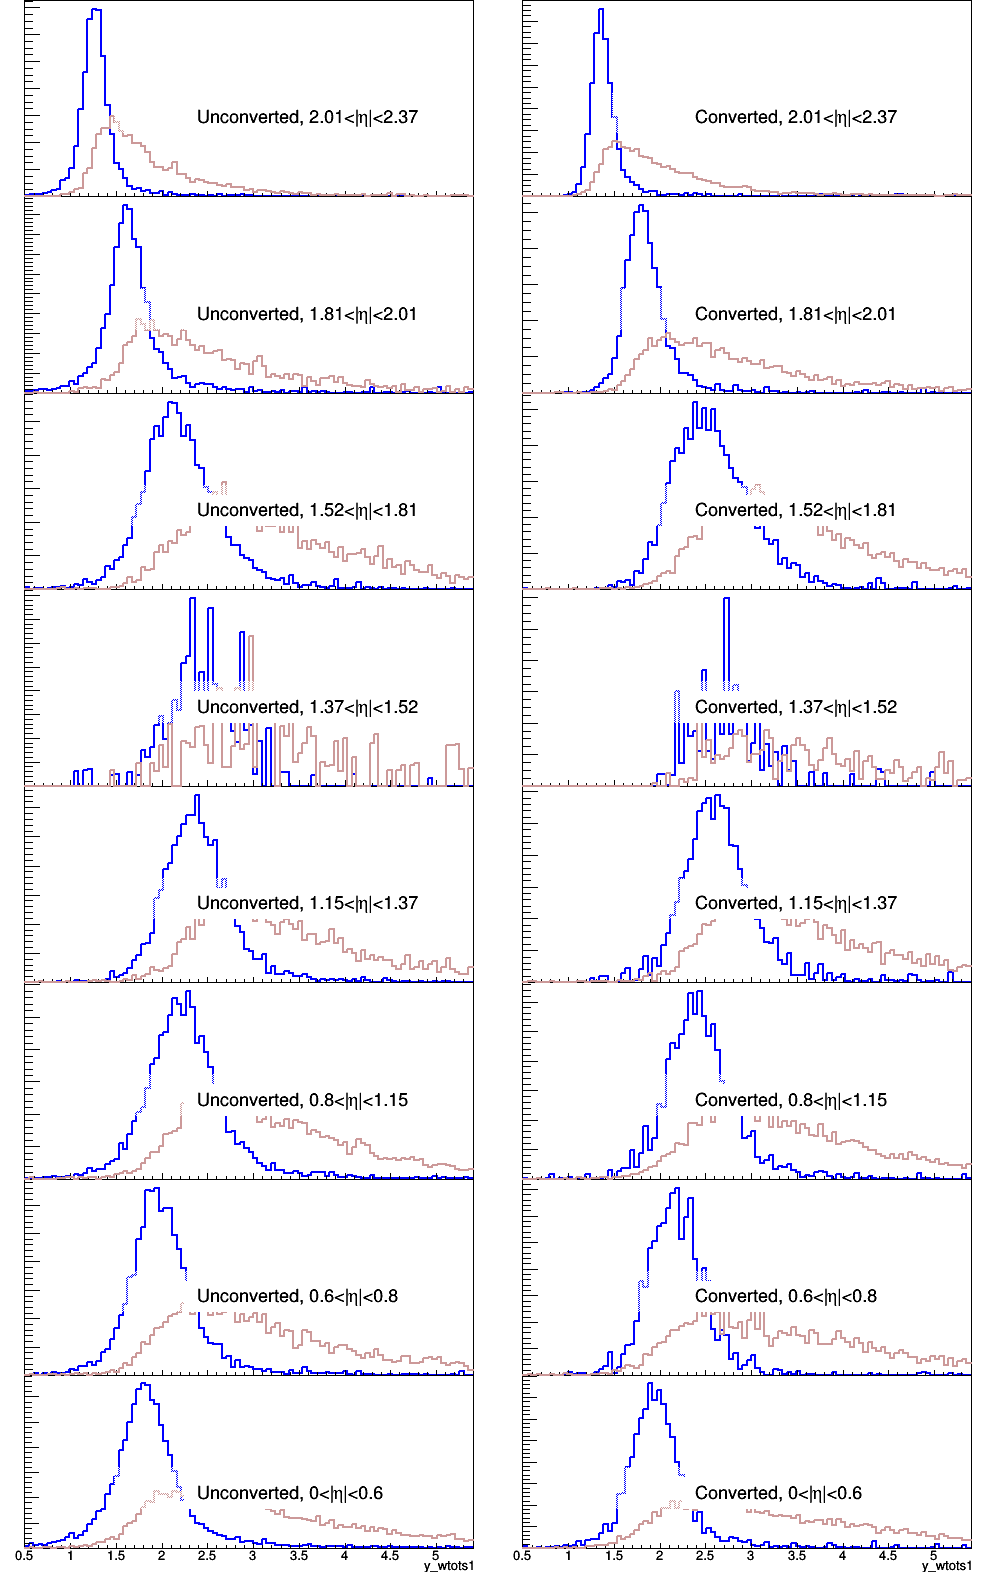

In [140]:
nstacks = 8
c, pads = GetMyPadsStacked(nstacks) # getting canvas splitted into pads

condition_unc_sig = (df['class']==1) & (df['y_isTruthMatchedPhoton']==True) & (df['y_convType']==0)
condition_unc_bkg = (df['class']==0) & (df['y_isTruthMatchedPhoton']==False) & (df['y_convType']==0)
condition_conv_sig = (df['class']==1) & (df['y_isTruthMatchedPhoton']==True) & (df['y_convType']!=0)
condition_conv_bkg = (df['class']==0) & (df['y_isTruthMatchedPhoton']==False) & (df['y_convType']!=0)

xmin, xmax = 0.5, 5.4
myVar = "y_wtots1"

#print condition_unc_sig

etabins = [0, 0.6, 0.8, 1.15, 1.37, 1.52, 1.81, 2.01, 2.37]

HistsList1=[]
HistsList2=[]

pav1 = []
pav2 = []

for istack in range(nstacks):
    pads[2*istack].cd()
    if(istack==0):
        pads[2*istack] = setPadMargins(pads[2*istack], 0.05, 0.05, 0.12, 0)
    else:
        pads[2*istack] = setPadMargins(pads[2*istack], 0.05, 0.05, 0.0,  0)
        
    cond1_unc = (abs(df['y_eta'])>etabins[istack]) & (abs(df['y_eta'])<etabins[istack+1]) & (condition_unc_sig)
    cond2_unc = (abs(df['y_eta'])>etabins[istack]) & (abs(df['y_eta'])<etabins[istack+1]) & (condition_unc_bkg)
    
    HistsList1.append( PlotHists(2, myVar, [xmin, xmax], [cond1_unc, cond2_unc], None) )
    HistsList1[istack][0] = prepareHist(HistsList1[istack][0])
    
    pav1.append(addText(0.37,0.32,0.92,0.48, "Unconverted, "+str(etabins[istack])+"<|#eta|<"+str(etabins[istack+1]), 0.10))
    pav1[istack].Draw()
    
    #Right Pad: Converted photons
    pads[2*istack+1].cd()
    if(istack==0):
        pads[2*istack+1] = setPadMargins(pads[2*istack+1], 0.05, 0.05, 0.12, 0)
    else:
        pads[2*istack+1] = setPadMargins(pads[2*istack+1], 0.05, 0.05, 0.0,  0)
        
    cond1_unc = (abs(df['y_eta'])>etabins[istack]) & (abs(df['y_eta'])<etabins[istack+1]) & (condition_conv_sig)
    cond2_unc = (abs(df['y_eta'])>etabins[istack]) & (abs(df['y_eta'])<etabins[istack+1]) & (condition_conv_bkg)
    
    HistsList2.append( PlotHists(2, myVar, [xmin, xmax], [cond1_unc, cond2_unc], None) )
    HistsList2[istack][0] = prepareHist(HistsList2[istack][0])
    
    pav2.append(addText(0.37,0.32,0.92,0.48, "Converted, "+str(etabins[istack])+"<|#eta|<"+str(etabins[istack+1]), 0.10))
    pav2[istack].Draw()

